In [282]:
from pylab import *
from scipy import *
from matplotlib.colors import LogNorm
from matplotlib import colors
from IPython.display import Image
from scipy.integrate import quad
from scipy import interpolate
from scipy.special import jn

In [215]:
data_mean = loadtxt('/Users/jia/weaklensing/lowz/fulle_bins2D_cross_jk_final.dat')[:,5].reshape(25,-1).T
rp_bins = loadtxt('/Users/jia/weaklensing/lowz/fulle_bins2D_cross_jk_final.dat')[:,0].reshape(25,-1).T
pi_bins = loadtxt('/Users/jia/weaklensing/lowz/fulle_bins2D_cross_jk_final.dat')[:,1].reshape(25,-1).T

In [178]:
print data_mean.shape
print rp_bins.shape, amin(rp_bins),amax(rp_bins)
print pi_bins.shape, amin(pi_bins),amax(pi_bins)
print data_mean2.shape,rp_bins2.shape, pi_bins2.shape

(20, 25)


In [219]:
## make a reflection for negative r 
data_mean2=concatenate([data_mean,data_mean])
rp_bins2=concatenate([rp_bins,-rp_bins])
pi_bins2=concatenate([pi_bins,pi_bins])

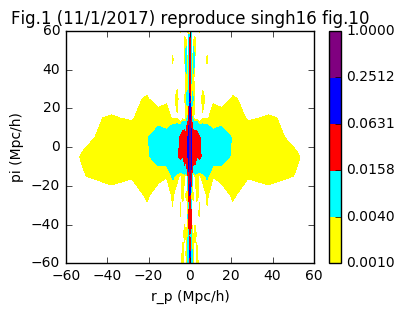

In [220]:
icolors=['yellow','cyan','red','blue','purple']
bounds=logspace(-3,0,6)

f=figure(figsize=(4,3))
ax=f.add_subplot(111)
CS=ax.contourf(rp_bins2, pi_bins2, data_mean2, bounds,colors=icolors)
ax.set_ylim(-60,60)
cbar = plt.colorbar(CS)
ax.set_xlim(-60,60)
ax.set_xlabel('r_p (Mpc/h)')
ax.set_ylabel('pi (Mpc/h)')
ax.set_title('Fig.1 (11/1/2017) reproduce singh16 fig.10')
show()

<img src="fig10b.jpg" style="width: 400px" align="left">

In [229]:
## dndz
allz = loadtxt('../lowz/lowz.dat').T[2]
print amax(allz),amin(allz) #0.16-0.36

0.997980892658 -0.000210120691918


In [280]:
zmin,zmax = 0.16, 0.36
nz, zedges=histogram(allz, bins=linspace(zmin,zmax,51))
istep = zedges[1]-zedges[0]
zcenter = zedges [:-1] + 0.5 * istep
dndz = nz.astype(float)/sum(nz)/istep
pz = interpolate.interp1d(zcenter,dndz,bounds_error=0,fill_value=0.)
zarr=linspace(0.1,0.4,1000)
pz_test = pz(zarr)

In [222]:
## cosmology WMAP9
h = 0.7
H0 = h*100
ob = 0.046
oc = 0.236
om = ob+oc
ol = 1-om#0.718
ns = 0.9646
s8 = 0.817

In [277]:
### constants and small functions
c = 299792.458#km/s
Gnewton = 6.674e-8#cgs cm^3/g/s^2

H = lambda z: H0*sqrt(om*(1+z)**3+ol)
H_inv = lambda z:  1/(H0*sqrt(om*(1+z)**3+ol))
Hcgs = lambda z: H(z)*3.24e-20
DC = lambda z: c*quad(H_inv, 0, z)[0]
W_fcn = lambda z: (pz(z) / DC(z))**2 / c * H(z) # dchi/dz = c/H
rho_cz = lambda z: 0.375*Hcgs(z)**2/pi/Gnewton

In [278]:
Wnorm = quad(W_fcn, zmin, zmax) [0]
W_arr = array([W_fcn(iz)/Wnorm for iz in zarr])
W = interpolate.interp1d(zarr,W_arr,bounds_error=0,fill_value=0.)

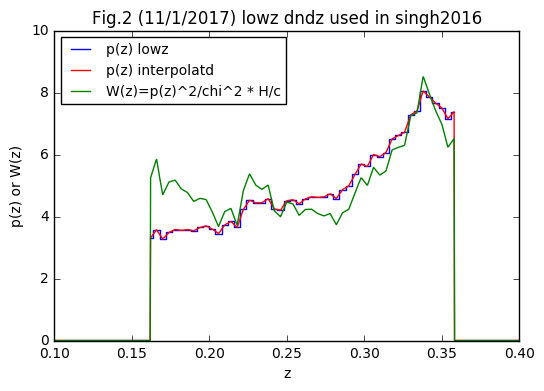

In [279]:
plot(zcenter, dndz, drawstyle='steps-mid',label='p(z) lowz')
plot(zarr,pz_test, 'r',label='p(z) interpolatd')
plot(zarr,W_arr, 'g',label='W(z)=p(z)^2/chi^2 * H/c')
xlabel('z')
ylabel('p(z) or W(z)')
ylim(0,10)
legend(fontsize=10,loc=0)
title('Fig.2 (11/1/2017) lowz dndz used in singh2016')
show()

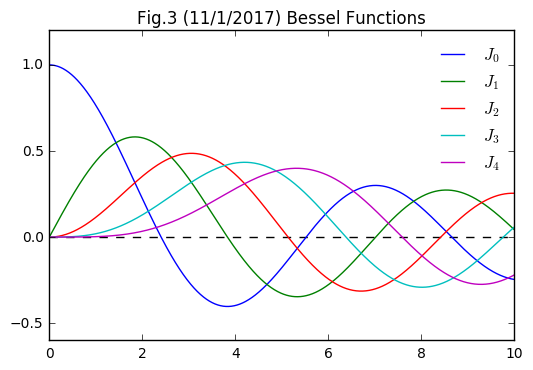

In [298]:
xarr=linspace(0,10,1001)
plot(xarr,zeros(len(xarr)),'k--')
for i in range(5):
    plot(xarr,jn(i,xarr),label='$J_%s$'%(i))
legend(frameon=0)
title('Fig.3 (11/1/2017) Bessel Functions')
show()

In [302]:
## interpolate Pk
Ptable = genfromtxt('/Users/jia/weaklensing/cmblensing/P_delta_Hinshaw')
aa = array([1/1.05**i for i in arange(33)])
zz = 1.0/aa-1 # redshifts
kk = Ptable.T[0]
iZ, iK = meshgrid(zz,kk)
Z, K = iZ.flatten(), iK.flatten()
Pk = Ptable[:,1:34].flatten()

Pmatter_interp = interpolate.CloughTocher2DInterpolator(array([K*h, Z]).T, 2.0*pi**2*Pk/(K*h)**3)
Pmatter = lambda k, z: Pmatter_interp (k, z)

In [312]:
## growth
zarr1=linspace(0,1,101)
az = lambda z: 1.0/(1.0+z)
za = lambda a: 1.0/a-1
D_fcn = lambda a: H(za(a))/H0 * quad(lambda a: (om/a+ol*a**2)**(-1.5), 0, a)[0]
D1 = D_fcn(1)
D_arr = array([D_fcn (az(iz)) for iz in zarr1])/D1

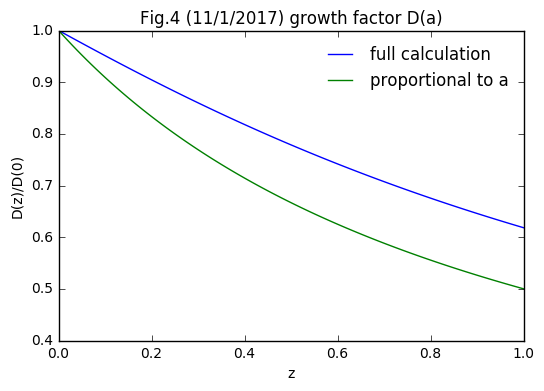

In [318]:
plot(zarr1,D_arr,label='full calculation')
plot(zarr1,az(zarr1),label='proportional to a')
xlabel('z')
ylabel('D(z)/D(0)')
legend(frameon=0)
title('Fig.4 (11/1/2017) growth factor D(a)')
show()